# Ground station data analysis

This notebook will walk us trough the steps to acces, analyze and visualize ground station data time series using SQL. 

### Access to single products

This section will show you how to connect, query and get data from a particular station. First, we need to import the necessary packages and make a connection to our database. We will use Pandas to visualize the data as it can natively read data from an SQL query.

In [1]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
conn = psycopg2.connect(dbname='ground_measurements', user='topro', password='#top2019', host='80.158.2.100', port='5432', sslmode='require')

Let's create first a query to get all the names of the available stations

In [2]:
cur = conn.cursor()
query1 = """SELECT * FROM stations ORDER BY name;"""

In [3]:
df1 = pd.read_sql_query(query1, conn)
df1

,id,name,latitude,longitude,height
0,14,AT900KE,48.160000,16.480000,158.0
1,17,AT900ZA,48.250000,16.360000,210.0
2,15,AT90A23,48.200000,16.430000,162.0
3,18,AT90AKC,48.220000,16.350000,199.0
4,16,AT90FLO,48.260000,16.400000,164.0
5,6,AT90LAA,48.160000,16.390000,251.0
6,9,AT90LOB,48.160000,16.530000,155.0
7,12,AT90MBA,48.190000,16.300000,194.0
8,7,AT90TAB,48.220000,16.380000,162.0
9,10,AT9BELG,48.170000,16.360000,218.0


We can now use any of the stations name to get NO2 measurements

In [4]:
cur = conn.cursor()

query = """SELECT * FROM measurements 
INNER JOIN stations ON measurements.stations_id = stations.id 
INNER JOIN products ON measurements.observed_field = products.id 
WHERE stations.name = 'AT9JAEG' 
AND measurements.observation_time_start >'2019-01-01 00:00:00+01' 
AND measurements.observation_time_start <'2019-02-01 00:00:00+01' 
AND products.product = 'NO2';"""

In [5]:
df = pd.read_sql_query(query, conn)
df

,id,stations_id,observation_time_start,observation_time_end,observed_field,value,id,name,latitude,longitude,height,id,product,measurement_unit,other_info
0,00400120190000001_NET.09,4,2019-01-01 08:00:00+00:00,2019-01-01 09:00:00+00:00,1,6.808,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
1,00400120190000030_NET.09,4,2019-01-01 05:00:00+00:00,2019-01-01 06:00:00+00:00,1,11.618,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
2,00400120190000031_NET.09,4,2019-01-01 06:00:00+00:00,2019-01-01 07:00:00+00:00,1,10.598,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
3,00400120190000032_NET.09,4,2019-01-01 07:00:00+00:00,2019-01-01 08:00:00+00:00,1,9.218,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
4,00400120190000033_NET.09,4,2019-01-03 10:00:00+00:00,2019-01-03 11:00:00+00:00,1,3.796,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
5,00400120190000034_NET.09,4,2019-01-03 11:00:00+00:00,2019-01-03 12:00:00+00:00,1,3.141,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
6,00400120190000035_NET.09,4,2019-01-03 12:00:00+00:00,2019-01-03 13:00:00+00:00,1,3.140,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
7,00400120190000036_NET.09,4,2019-01-03 13:00:00+00:00,2019-01-03 14:00:00+00:00,1,3.609,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
8,00400120190000037_NET.09,4,2019-01-03 14:00:00+00:00,2019-01-03 15:00:00+00:00,1,3.865,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None
9,00400120190000038_NET.09,4,2019-01-03 15:00:00+00:00,2019-01-03 16:00:00+00:00,1,2.521,4,AT9JAEG,48.27,16.3,488.0,1,NO2,µg/m3,None


And finally we can visualize the data just using the column name

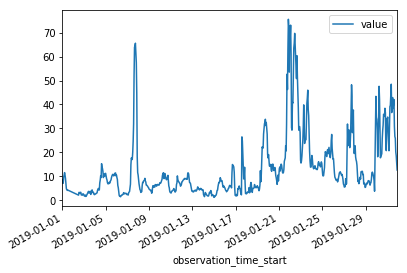

In [6]:
ax = plt.gca()
df.plot(kind='line',x='observation_time_start',y='value',ax=ax)

In [7]:
cur.close()
conn.close()

# Exercise 

* Try selecting a different ground station, different time range and product. You'll have to change the last four lines in the query.
* Try plotting different stations to compare